In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import skewnorm
# from ll_xy import lonlat_to_xy
from scipy.stats import linregress
import string
import cartopy
import cartopy.crs as ccrs
import pandas as pd
pd.set_option("mode.chained_assignment", None)
import tools

dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))

In [24]:

bw = 0.1

bin_edges = np.arange(-2.5,3,bw)

bin_centres = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2


def make_fit_and_df(spacing):

    transect_count = 0

    all_list = []

    for key in dep_l:

        station = dep_l[key]

        for date in station:

            transect_count += 1

            series = np.array(list(station[date]))[::spacing]

            n_series = (series - np.nanmean(series))

            std = np.nanstd(n_series)

            ns_series = n_series/std


            all_list.append({'std':std,
                         'mean':np.nanmean(series),
                         'norm':ns_series,
                        })

    all_df = pd.DataFrame(all_list)

    all_statistics = tools.get_statistics(all_df)

    #########

    flat = np.concatenate(all_df['norm']).ravel()

    flat = flat[~np.isnan(flat)]

    p, x = np.histogram(flat,
                        bins=bin_edges,
                        density=True,
                       )

    fit = skewnorm.pdf(bin_centres,all_statistics['a'],all_statistics['loc'],all_statistics['scale'])
    
    return(all_df, fit, all_statistics)


dfs, fits, stats = [], [], []
for spacing in [1,5,10]:

    all_df, fit, all_statistics = make_fit_and_df(spacing=spacing)
    
    dfs.append(all_df)
    fits.append(fit)
    stats.append(all_statistics)

/home/robbie/Dropbox/sub_km/notebooks/tools.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  CV = np.linalg.lstsq(np.array(df['mean'])[:, np.newaxis], df['std'])[0][0]


0.41696167189340233 2.542562886886376
0.3856221302819045 2.1385999720841746
0.3617705754915234 1.8446810953990558


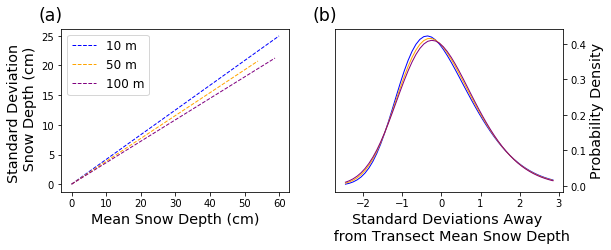

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,3))

for df, fit, all_statistics, color, spacing in zip(dfs, fits, stats, ['b','orange','purple'], [1, 5, 10]):

    linear_prediction = np.array([0,np.max(df['mean'])])*all_statistics['CV']
    
    print(all_statistics['CV'], all_statistics['a'])
    
    if spacing in [1,5,10]:
    
        ax1.plot([0,np.max(df['mean'])], linear_prediction, lw=1, ls='--', color=color, label = f'{spacing}0 m')

        ax2.plot(bin_centres, fit, lw=1, color=color)

    # ax2.annotate(f"n = {all_statistics['n']}", xy=(0.95,0.95),xycoords='axes fraction',ha='right',va='top',fontsize='x-large')


ax1.set_xlabel('Mean Snow Depth (cm)', fontsize='x-large')
ax1.set_ylabel('Standard Deviation \n Snow Depth (cm)', fontsize='x-large')

ax1.annotate('(a)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')

ax1.legend(fontsize='large')

    
ax2.set_ylabel('Probability Density', fontsize='x-large')
ax2.set_xlabel('Standard Deviations Away \n from Transect Mean Snow Depth', fontsize='x-large')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")


ax2.annotate('(b)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')

plt.savefig('../figures/sampling_sensitivity.png', bbox_inches='tight',dpi=500)
plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/sampling_sensitivity.png', bbox_inches='tight',dpi=500)

plt.show()

In [29]:
dfs, fits, stats = [], [], []

for spacing in [1,2,3,5,10]:

    all_df, fit, all_statistics = make_fit_and_df(spacing=spacing)
    
    dfs.append(all_df)
    fits.append(fit)
    stats.append(all_statistics)

save_dict = {}
for df, fit, all_statistics, spacing in zip(dfs, fits, stats, [1, 2, 3, 5, 10]):

    linear_prediction = np.array([0,np.max(df['mean'])])*all_statistics['CV']
    save_dict[spacing] = ([0,np.max(df['mean'])], linear_prediction,bin_centres, fit)


pickle.dump(save_dict,open('../pickles/spacing.p','wb'))

save_dict.keys()

dict_keys([1, 2, 3, 5, 10])